# Song genre classification

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Song-genre-classification" data-toc-modified-id="Song-genre-classification-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Song genre classification</a></span><ul class="toc-item"><li><span><a href="#Intro" data-toc-modified-id="Intro-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Intro</a></span><ul class="toc-item"><li><span><a href="#Goals" data-toc-modified-id="Goals-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Goals</a></span></li><li><span><a href="#The-data" data-toc-modified-id="The-data-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>The data</a></span><ul class="toc-item"><li><span><a href="#Source-&amp;-description" data-toc-modified-id="Source-&amp;-description-1.1.2.1"><span class="toc-item-num">1.1.2.1&nbsp;&nbsp;</span>Source &amp; description</a></span></li><li><span><a href="#Get-the-data" data-toc-modified-id="Get-the-data-1.1.2.2"><span class="toc-item-num">1.1.2.2&nbsp;&nbsp;</span>Get the data</a></span></li></ul></li><li><span><a href="#Exploratory-Data-Analysis-&amp;-Cleaning" data-toc-modified-id="Exploratory-Data-Analysis-&amp;-Cleaning-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Exploratory Data Analysis &amp; Cleaning</a></span></li></ul></li><li><span><a href="#Model-training" data-toc-modified-id="Model-training-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Model training</a></span><ul class="toc-item"><li><span><a href="#CatBoost-multiclass-with-GridSearch-and-Crossvalidation" data-toc-modified-id="CatBoost-multiclass-with-GridSearch-and-Crossvalidation-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>CatBoost multiclass with GridSearch and Crossvalidation</a></span></li><li><span><a href="#50-iterations-CatBoost-model" data-toc-modified-id="50-iterations-CatBoost-model-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>50 iterations CatBoost model</a></span></li><li><span><a href="#Feature-importance" data-toc-modified-id="Feature-importance-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Feature importance</a></span></li><li><span><a href="#Evaluation-metrics" data-toc-modified-id="Evaluation-metrics-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Evaluation metrics</a></span></li><li><span><a href="#SHAP" data-toc-modified-id="SHAP-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>SHAP</a></span><ul class="toc-item"><li><span><a href="#Bar-plot-and-feature-importance" data-toc-modified-id="Bar-plot-and-feature-importance-1.2.5.1"><span class="toc-item-num">1.2.5.1&nbsp;&nbsp;</span>Bar plot and feature importance</a></span></li><li><span><a href="#Beeswarm-plot-for-each-class" data-toc-modified-id="Beeswarm-plot-for-each-class-1.2.5.2"><span class="toc-item-num">1.2.5.2&nbsp;&nbsp;</span>Beeswarm plot for each class</a></span></li><li><span><a href="#Dependence-plot-for-Rap:-relation-between-Key-and-Mode-on-the-output-of-the-model" data-toc-modified-id="Dependence-plot-for-Rap:-relation-between-Key-and-Mode-on-the-output-of-the-model-1.2.5.3"><span class="toc-item-num">1.2.5.3&nbsp;&nbsp;</span>Dependence plot for Rap: relation between Key and Mode on the output of the model</a></span></li><li><span><a href="#More-dependence-plots-for-class-=-EDM" data-toc-modified-id="More-dependence-plots-for-class-=-EDM-1.2.5.4"><span class="toc-item-num">1.2.5.4&nbsp;&nbsp;</span>More dependence plots for class = EDM</a></span></li><li><span><a href="#Force-plot:-visualize-the-corresponding-SHAP-values-of-the-predicted-class-of-a-single-instance" data-toc-modified-id="Force-plot:-visualize-the-corresponding-SHAP-values-of-the-predicted-class-of-a-single-instance-1.2.5.5"><span class="toc-item-num">1.2.5.5&nbsp;&nbsp;</span>Force plot: visualize the corresponding SHAP values of the predicted class of a single instance</a></span></li><li><span><a href="#Decision-plot:-SHAP-values-of-a-single-instance,-all-classes" data-toc-modified-id="Decision-plot:-SHAP-values-of-a-single-instance,-all-classes-1.2.5.6"><span class="toc-item-num">1.2.5.6&nbsp;&nbsp;</span>Decision plot: SHAP values of a single instance, all classes</a></span></li></ul></li></ul></li><li><span><a href="#Pickle-the-model-and-some-data-for-the-Streamlit-app" data-toc-modified-id="Pickle-the-model-and-some-data-for-the-Streamlit-app-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Pickle the model and some data for the Streamlit app</a></span></li></ul></li></ul></div>

## Intro

### Goals

* Train a CatBoost song genre classification model (6 classes; CatBoost Multiclassification)

* Explain the model output with [**SHAP** (SHapley Additive exPlanations)](https://github.com/slundberg/shap)

* Build a data app with [**Streamlit**](https://www.streamlit.io/to) to:
    - output predictions with new data
    - explain the output
    - access advanced SHAP plots obtained inputting the evaluation dataset
    
* Containerize the app

* Deploy on AWS EC2

### The data

#### Source & description

The dataset comes from a [TidyTuesday](https://github.com/rfordatascience/tidytuesday) weekly challenge, and can be found [here](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-01-21/readme.md).

The very detailed accompanying [**blog post**](https://www.kaylinpavlik.com/classifying-songs-genres/) on how the data has been collected, containing some EDA, a PCA, three classification models (decision tree, random forest, XgBoost), their training, analysis and comparison.

The feature description can be found on the [Spotify API documentation](https://developer.spotify.com/documentation/web-api/reference/#object-audiofeaturesobject).

In [1]:
# Import packages
import numpy as np
import pandas as pd
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
import shap

from catboost import CatBoostClassifier, Pool

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Set random seed
np.random.seed(42)

#### Get the data

In [2]:
# Get the data
raw_data = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv')
raw_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

 ### Exploratory Data Analysis & Cleaning
 
This EDA is **very light**, a more complete one can be found on the [**original blog post**](https://www.kaylinpavlik.com/classifying-songs-genres/) accompanying the dataset.
 
 
 
Data cleaning:
* There are duplicated tracks with different genres. I kepi all the duplicates, as there is no good way to determine which genres to remove/keep for a track.
* No outlier removal
* Formatting the categorical features

In [3]:
# Instance of a duplicate with multiple genres
raw_data[raw_data['track_id'] == '7BKLCZ1jbUBVqRi2FVlTVw']

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
133,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,Dance Pop,37i9dQZF1DWZQaaqNMbbXa,pop,...,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960
1731,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,Post pop teen,222nc9tKxKhfZ2GBrOpwH3,pop,...,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960
2478,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,Electropop Hits 2017-2020,7kyvBmlc1uSqsTL0EuNLrx,pop,...,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960
4535,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,A Loose Definition of Indie Poptimism,4ZO0wp9G8FA3X6oYNBzda6,pop,...,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960
7369,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,◤ Hip Hop Dance Music – Urban – Trap – Breakin...,0Hr2h94pKN8QAGVAgD6BsD,rap,...,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960
17467,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,Tropical House Run 190 BPM,37i9dQZF1DWSTc9FdySHtz,latin,...,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960
18358,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,4JkkvMpVl4lSioqQjeAL0q,latin,...,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960
19770,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,4JkkvMpVl4lSioqQjeAL0q,latin,...,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960
23784,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,4JkkvMpVl4lSioqQjeAL0q,r&b,...,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960
30629,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,2015 songs,6UJw1egIcZVfrBmcKs5uHH,edm,...,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960


<BarContainer object of 6 artists>

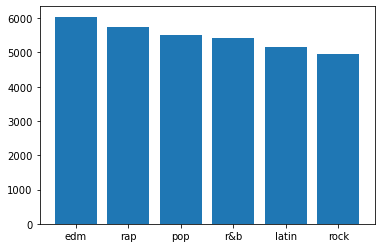

In [4]:
# Plot class distribution
plt.bar(raw_data['playlist_genre'].value_counts().index, raw_data['playlist_genre'].value_counts())

The classes are unbalanced, but nothing too severe.

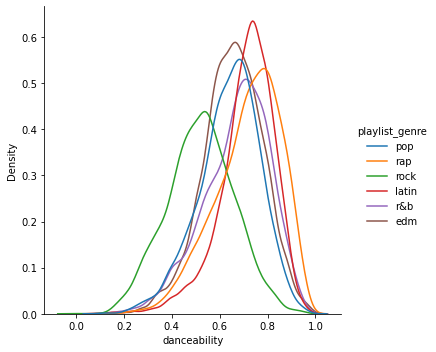

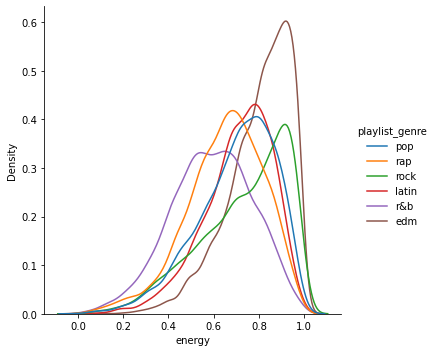

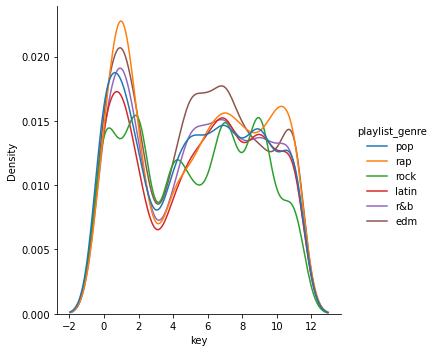

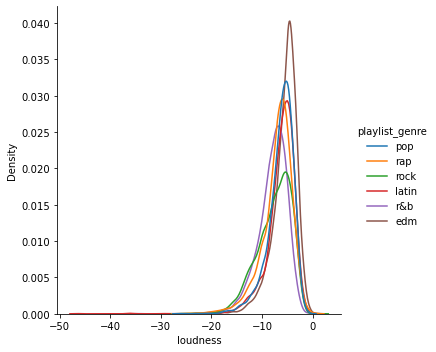

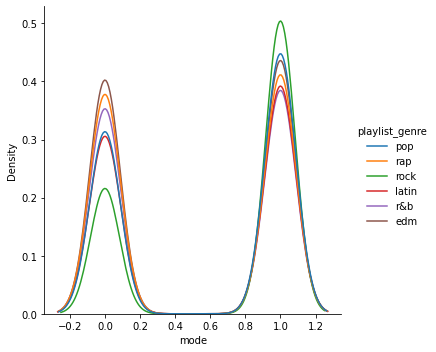

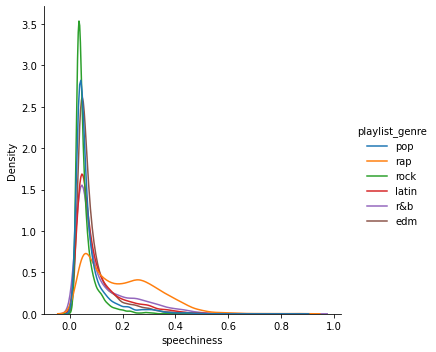

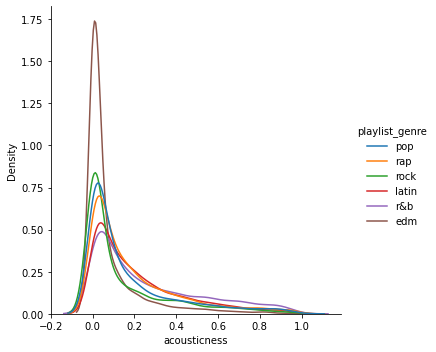

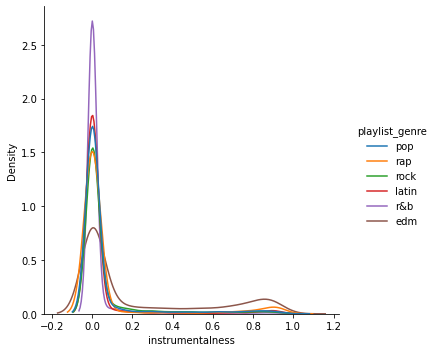

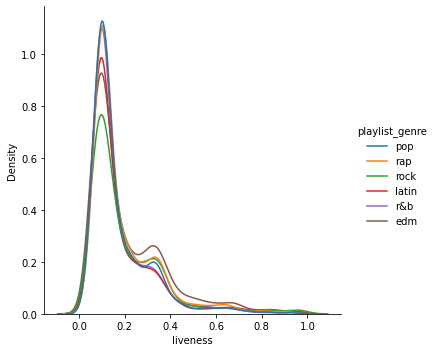

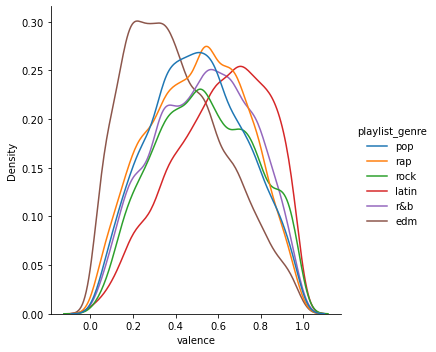

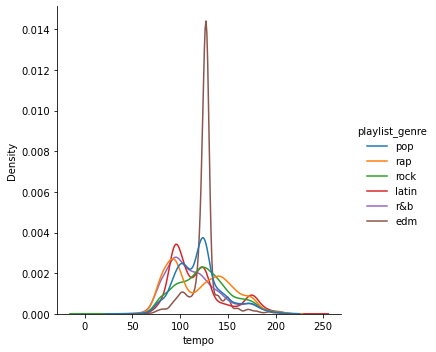

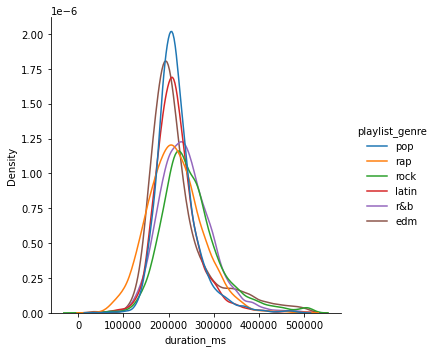

In [5]:
# Density plot for each feature per class
for i in raw_data.loc[:, 'danceability':'duration_ms']:
    sns.displot(raw_data, x=i, hue='playlist_genre', kind='kde')

From these density plots; a few standouts:
* rock = lower danceability
* edm = higher energy, lower acousticness and valence, tempo ~125bpm
* rap = more speechiness

In [6]:
df = raw_data[['track_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms','playlist_genre']]

# Set right Dtype for categorical data
df['key'] = df['key'].astype('category',copy=False)
df['mode'] = df['mode'].astype('category',copy=False)
df['playlist_genre'] = df['playlist_genre'].astype('category',copy=False)

df = df.reset_index(drop=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   track_popularity  32833 non-null  int64   
 1   danceability      32833 non-null  float64 
 2   energy            32833 non-null  float64 
 3   key               32833 non-null  category
 4   loudness          32833 non-null  float64 
 5   mode              32833 non-null  category
 6   speechiness       32833 non-null  float64 
 7   acousticness      32833 non-null  float64 
 8   instrumentalness  32833 non-null  float64 
 9   liveness          32833 non-null  float64 
 10  valence           32833 non-null  float64 
 11  tempo             32833 non-null  float64 
 12  duration_ms       32833 non-null  int64   
 13  playlist_genre    32833 non-null  category
dtypes: category(3), float64(9), int64(2)
memory usage: 2.9 MB



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


 ## Model training
 
The model trained is a CatBoost multiclassifier (nb. not a multilabel)

In [7]:
# Split data into X and y
X = df.iloc[:,0:13]
y = df.iloc[:,13]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.025, random_state=42)

In [8]:
# Set categorical features for training
cat_features = [3, 5]

# Create Pool training set
train_set = Pool(data=X_train,
                 label=y_train,
                 cat_features=cat_features)

# Create Pool evaluation set
eval_set = Pool(data=X_test,
                label=y_test,
                cat_features=cat_features)

### CatBoost multiclass with GridSearch and Crossvalidation

In [9]:
# Specify the training parameter values for the grid search
grid = {'verbose':[1000],
        'random_seed':[42],
        'task_type':['GPU'],
        'depth': [6, 8, 10],
        'learning_rate': [0.05, 0.1, 0.125],
        'iterations': [50, 500, 1000]
        }

# Specify the loss function and metric
grid_search_model = CatBoostClassifier(loss_function='MultiClass', eval_metric='Accuracy')

# Grid Search with Crossvalidation
grid_search_result = grid_search_model.grid_search(grid, X=train_set, cv=5, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.3121168	test: 0.3151648	best: 0.3151648 (0)	total: 25.2ms	remaining: 1.23s
49:	learn: 0.5274708	test: 0.5250664	best: 0.5250664 (49)	total: 981ms	remaining: 0us
bestTest = 0.5250663751
bestIteration = 49
0:	loss: 0.5250664	best: 0.5250664 (0)	total: 1.71s	remaining: 44.4s
0:	learn: 0.3121168	test: 0.3151648	best: 0.3151648 (0)	total: 25.9ms	remaining: 1.27s
49:	learn: 0.5530478	test: 0.5466188	best: 0.5480244 (47)	total: 965ms	remaining: 0us
bestTest = 0.5480243636
bestIteration = 47
1:	loss: 0.5480244	best: 0.5480244 (1)	total: 3.05s	remaining: 38.1s
0:	learn: 0.3121168	test: 0.3151648	best: 0.3151648 (0)	total: 19.4ms	remaining: 950ms
49:	learn: 0.5615994	test: 0.5545838	best: 0.5545838 (49)	total: 934ms	remaining: 0us
bestTest = 0.5545837888
bestIteration = 49
2:	loss: 0.5545838	best: 0.5545838 (2)	total: 4.38s	remaining: 35.1s
0:	learn: 0.3121168	test: 0.3151648	best: 0.3151648 (0)	total: 19.1ms	remaining: 9.54s
499:	learn: 0.6225546	test: 0.5769171	best: 0.5772294 (462

In [10]:
# Best training parameters
grid_search_result['params']

{'depth': 6,
 'random_seed': 42,
 'verbose': 1000,
 'iterations': 1000,
 'learning_rate': 0.1,
 'task_type': 'GPU'}

### 50 iterations CatBoost model

Despite not being the model offering the best results, using only 50 iterations, a tree depth of 6 and a higher learning rate seems to offer good results and will speed up the prediction on the web app, which is my main focus. Let's train and use this model from now on.

In [11]:
# Specify CatBoost training parameters
model = CatBoostClassifier(loss_function='MultiClass',
                           iterations=50,
                           eval_metric='Accuracy',
                           custom_metric='F1',
                           depth=6,
                           verbose=False,
                           learning_rate=0.125,
                           random_seed=42,
                           task_type="GPU")

#  Fit model
trained_model = model.fit(train_set, 
                          eval_set=eval_set,
                          plot=True)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [12]:
# Get predicted classes
preds_class = trained_model.predict(eval_set)

# Get predicted probabilities for each class
preds_proba = trained_model.predict_proba(eval_set)

### Feature importance

In [13]:
# Print feature importance
trained_model.get_feature_importance(eval_set, prettified=True)

,Feature Id,Importances
0,danceability,28.676646
1,speechiness,18.706055
2,tempo,11.740426
3,valence,8.309844
4,energy,7.781819
5,duration_ms,6.438521
6,instrumentalness,5.888933
7,loudness,5.620673
8,acousticness,4.112931
9,track_popularity,1.983765


From CatBoost documentation : ["Feature importance values are normalized so that the sum of importances of all features is equal to 100."](https://catboost.ai/docs/concepts/fstr.html)

Danceability and Speechiness have on average the biggest influence on the predictions of the model.

### Evaluation metrics

In [14]:
# Get evaluation metrics calculated on the evaluation set for first and last iterations of the model
trained_model.eval_metrics(eval_set, ['Precision', 'Recall', 'F1', 'TotalF1', 'Accuracy', 'AUC'], eval_period=49)

{'Precision:class=0': [0.2751937984496124, 0.6613756613756614],
 'Precision:class=1': [0.16230366492146597, 0.3684210526315789],
 'Precision:class=2': [1.0, 0.32],
 'Precision:class=3': [1.0, 0.49137931034482757],
 'Precision:class=4': [0.4418604651162791, 0.5698324022346368],
 'Precision:class=5': [0.43, 0.6056338028169014],
 'Recall:class=0': [0.43558282208588955, 0.7668711656441718],
 'Recall:class=1': [0.2980769230769231, 0.33653846153846156],
 'Recall:class=2': [0.0, 0.23880597014925373],
 'Recall:class=3': [0.0, 0.41304347826086957],
 'Recall:class=4': [0.4935064935064935, 0.6623376623376623],
 'Recall:class=5': [0.671875, 0.671875],
 'F1:class=0': [0.33729216152019004, 0.7102272727272727],
 'F1:class=1': [0.21016949152542375, 0.35175879396984927],
 'F1:class=2': [0.0, 0.27350427350427353],
 'F1:class=3': [0.0, 0.44881889763779526],
 'F1:class=4': [0.4662576687116564, 0.6126126126126127],
 'F1:class=5': [0.524390243902439, 0.637037037037037],
 'TotalF1': [0.2628037535292842, 0.51

The first metric values correspond to the first trained tree. The focus here is on the second ones, corresponding to the tree ensemble (50 trees, full model).

* Accuracy is better than random (16.6%).
* Lower performance overall for pop, r&b and latin
* Better performance for rap, edm and rock

In [15]:
# Confusion matrix
confusion_matrix(y_test, preds_class)

array([[125,   7,  16,   2,   8,   5],
       [ 13,  35,  17,  13,  22,   4],
       [ 24,  19,  32,  20,  14,  25],
       [  5,  18,  11,  57,  31,  16],
       [ 12,  11,  11,  12, 102,   6],
       [ 10,   5,  13,  12,   2,  86]], dtype=int64)

### SHAP

Here's a rapid look at a few plots created with the SHAP library on the evaluation set.

In [16]:
# load JS visualization code to notebook
# necessary to display SHAP plots
shap.initjs()

In [17]:
# shap values for evaluation set
explainer = shap.explainers.Tree(trained_model)
shap_values = explainer.shap_values(X_test)
expected_value = explainer.expected_value

In [18]:
# Array of the classes
trained_model.classes_

array(['edm', 'latin', 'pop', 'r&b', 'rap', 'rock'], dtype=object)

#### Bar plot and feature importance

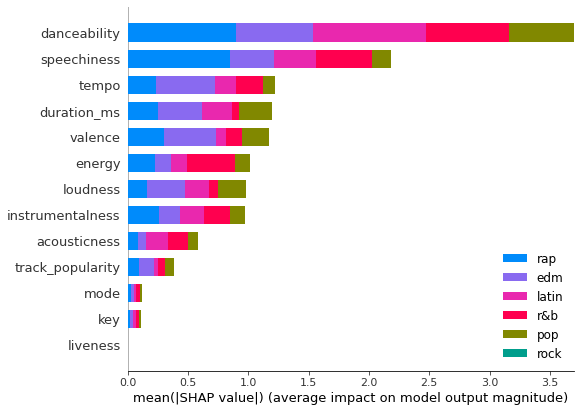

In [19]:
# Bar plot of shap values
shap.summary_plot(shap_values, X_test, plot_type="bar", class_names=trained_model.classes_)

Similar "feature importance" with CatBoost library and SHAP values.

#### Beeswarm plot for each class

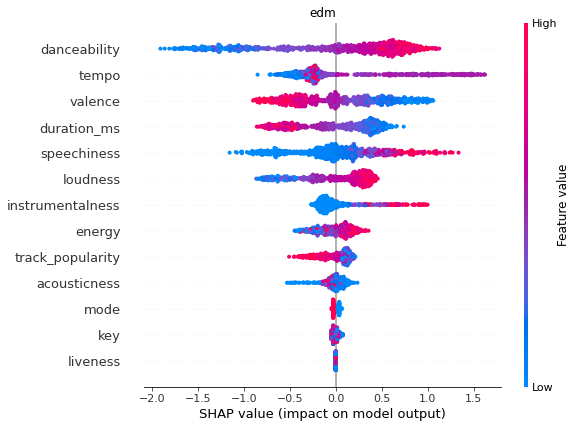

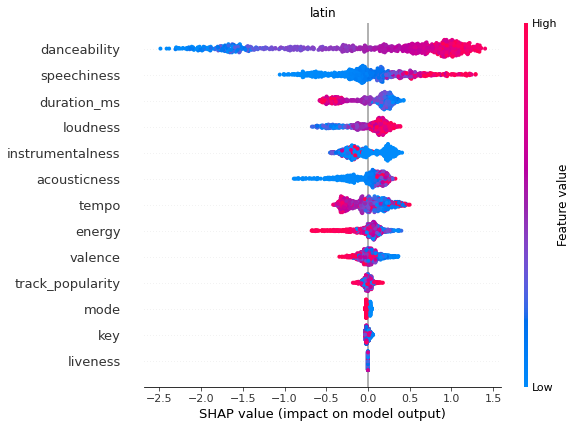

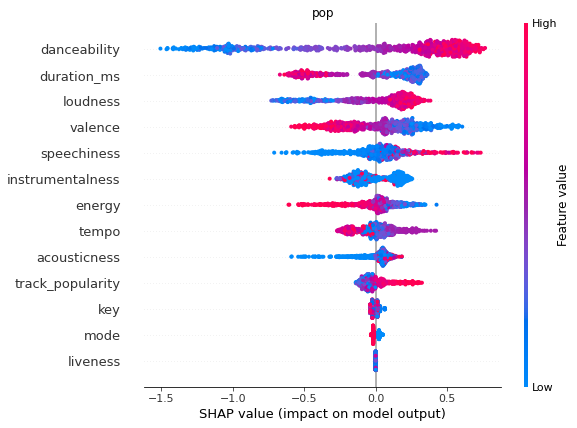

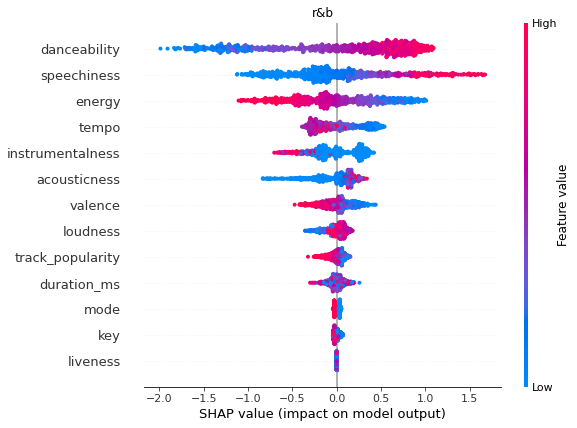

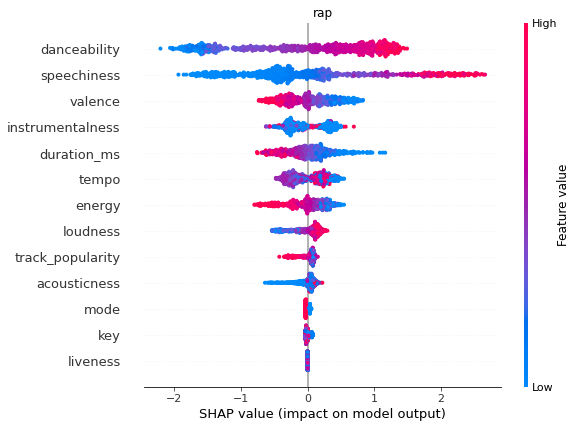

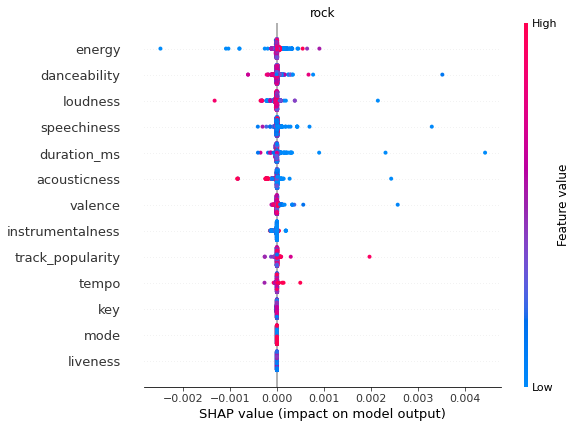

In [20]:
# Print a beeswarm plot of shap values for each class 
for i in range(6):
    shap.summary_plot(shap_values[i], X_test, show=False)
    plt.title(trained_model.classes_[i])
    plt.show()


From the documentation:

*The [beeswarm plot](https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/beeswarm.html) is designed to display an information-dense summary of how the top features in a dataset impact the model’s output* (for one class only in the case of a multiclass classifier)*. 
For each instance, the given explanation is represented by a single dot on each feature fow. The x position of the dot is determined by the SHAP value of that feature, and dots “pile up” along each feature row to show density. Color is used to display the original value of a feature.*



#### Dependence plot for Rap: relation between Key and Mode on the output of the model

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


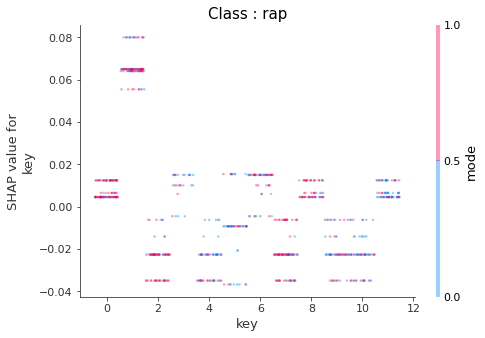

In [21]:
# Dependence plot of 2 categorical values for class = rap
shap.dependence_plot('key', shap_values[4], X_test, interaction_index='mode', x_jitter=0.95, alpha=0.4, dot_size=6, show=False)
plt.title(f'Class : {trained_model.classes_[4]}', fontsize=15)
plt.show()


From the SHAP documentation:

"*A [**dependence plot**](https://slundberg.github.io/shap/notebooks/plots/dependence_plot.html) is a scatter plot that shows the effect a single feature has on the predictions made by the model.* 

- *Each dot is a single prediction (row) from the dataset.*
- *The x-axis is the value of the feature (from the X matrix).*
- *The y-axis is the SHAP value for that feature, which represents how much knowing that feature's value changes the output of the model for that sample's prediction. For this model the units are log-odds of making over 50k annually.*
- *The color corresponds to a second feature that may have an interaction effect with the feature we are plotting (by default this second feature is chosen automatically). If an interaction effect is present between this other feature and the feature we are plotting it will show up as a distinct vertical pattern of coloring. For the example below 20-year-olds with a high level of education are less likely make over 50k than 20-year-olds with a low level of education. This suggests an interaction effect between Education-Num and Age.*"


Here the feature key goes from 0 (C) to 12 (B) by consecutive semi-tone. Mode is minor if = 0, major if = 1.

We can see that the probability of rap tends to be higher if the key is C# relatively to other keys.
D# (3) major has a geater positive impact than minor on the probability of rap. G (10) major has a greater negative impact on the probability of rap compared to minor.

#### More dependence plots for class = EDM

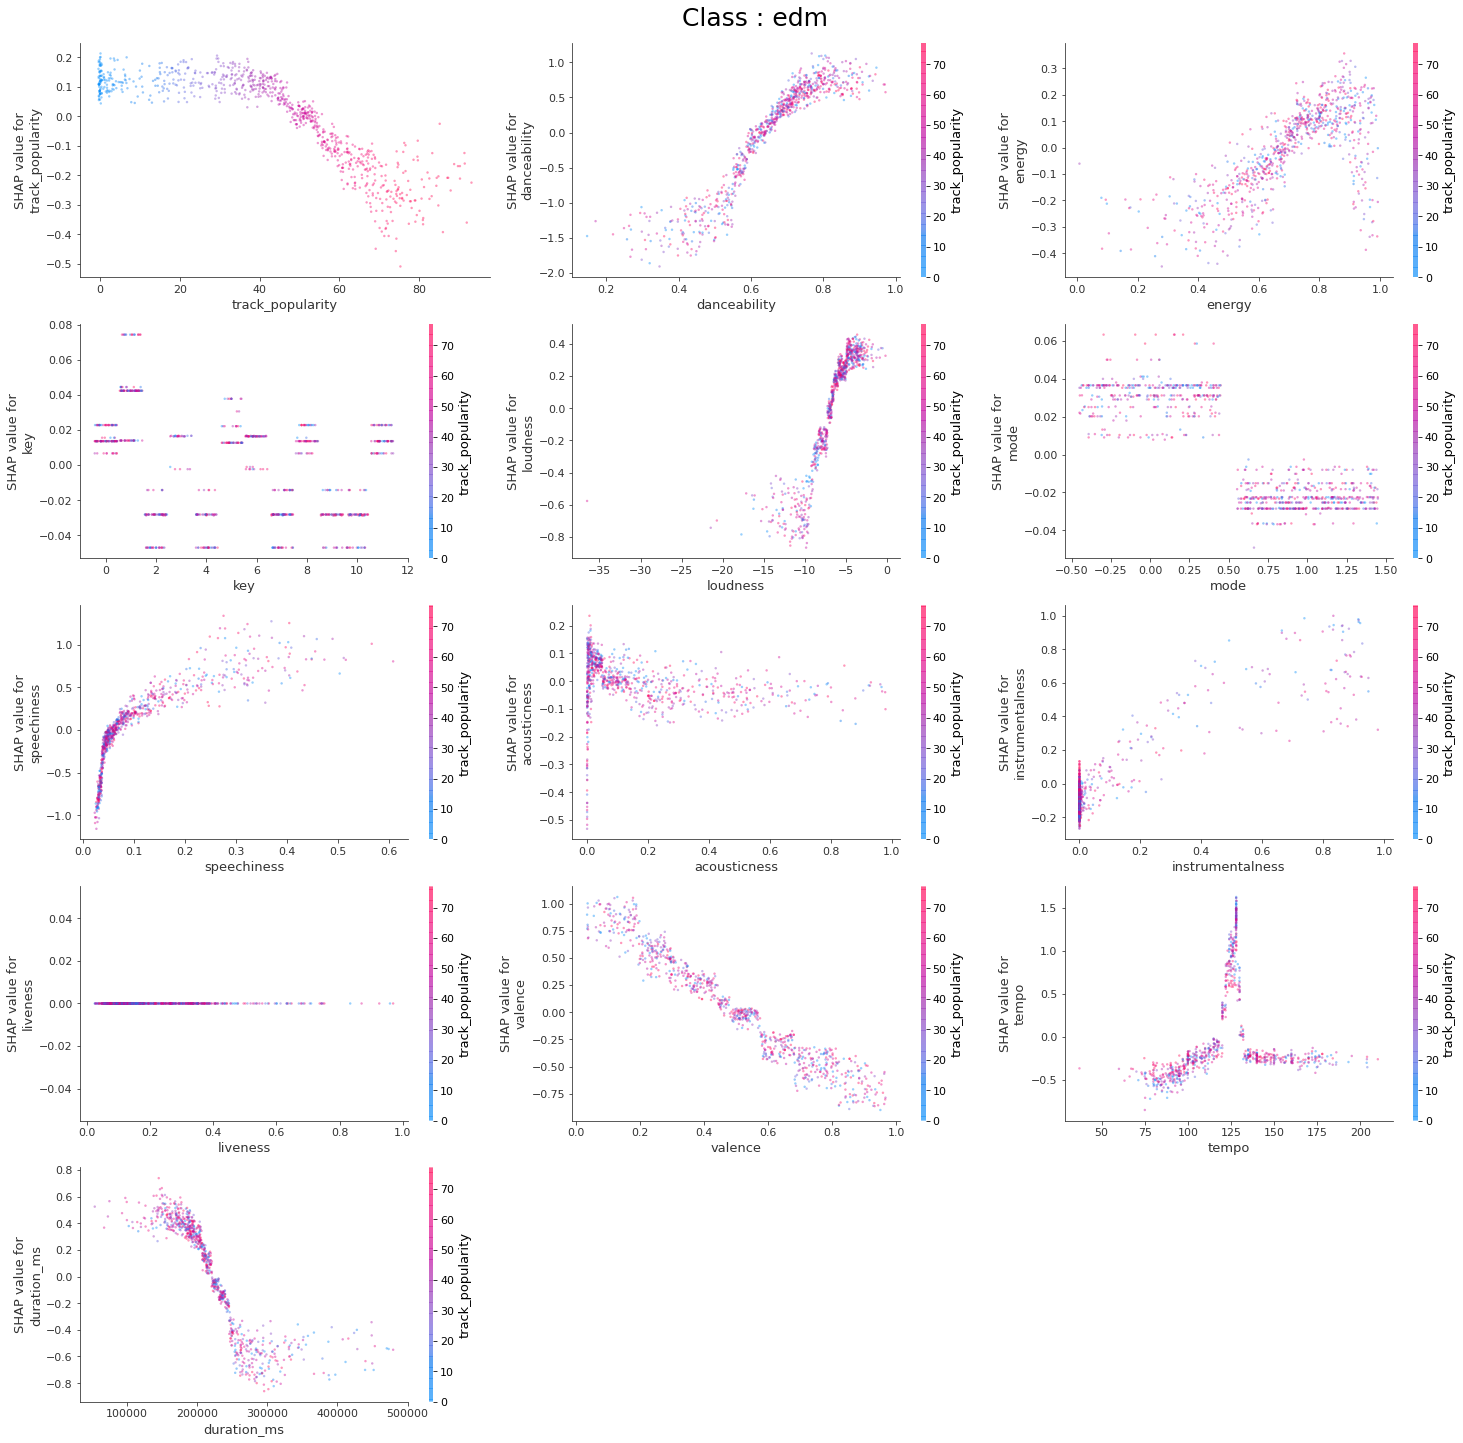

In [22]:
# Grid of dependence plots of every feature vs. track_popularity for class = EDM
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(25, 25))
fig.suptitle(f'Class : {trained_model.classes_[0]}',
             fontsize=25,
             y='0.9')
axes = axes.ravel()
fig.delaxes(axes[14])
fig.delaxes(axes[13])

for index, feature in enumerate(X_test.columns):
    shap.dependence_plot(feature, shap_values[0], X_test, interaction_index=0, ax=axes[index], x_jitter= 0.9, alpha=0.4, dot_size=6, show=False)

plt.show()
#https://stackoverflow.com/questions/58510005/python-shap-package-how-to-plot-a-grid-of-dependence-plots
    


* At any instrumentalness level over 0, a lower track popularity has a positive impact on the EDM outputed probability
* a tempo of ~125bpm has a huge positive impact on the predicted probability of EDM

#### Force plot: visualize the corresponding SHAP values of the predicted class of a single instance

In [23]:
# the specific song (index of a song in the evaluation set)
row_index=7


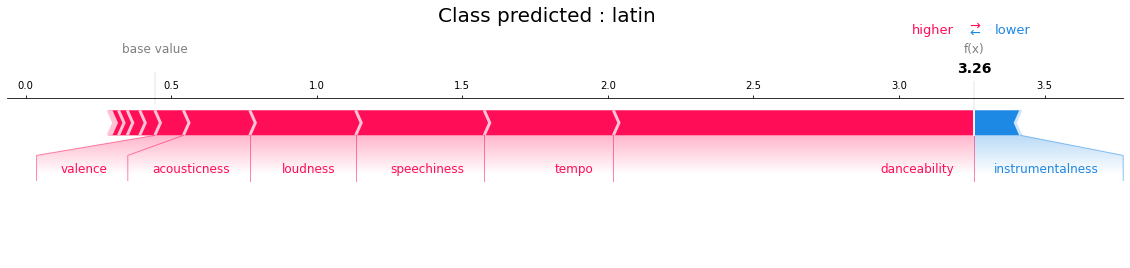

In [24]:
# force plot
shap.force_plot(expected_value[np.argmax(preds_proba[row_index])],
                shap_values[np.argmax(preds_proba[row_index])][row_index],
                eval_set.get_feature_names(),
                matplotlib=True,
                show=False)

plt.suptitle(f'Class predicted : {trained_model.classes_[np.argmax(preds_proba[row_index])]}',
             fontsize=20,
             y=1.3)
plt.show()




The force plot shows how each feature has contributed in moving away or towards the base value (average class output of the evaluation dataset) in to the predicted value of the specific instance (inputed on the left side bar).

Those values are **log odds**: SHAP doesn't support output probabilities for Multiclassification as of now.

The SHAP values displayed are additive. Once the negative values (blue) are substracted from the positive values (pink), the distance from the base value to the output remains.


#### Decision plot: SHAP values of a single instance, all classes

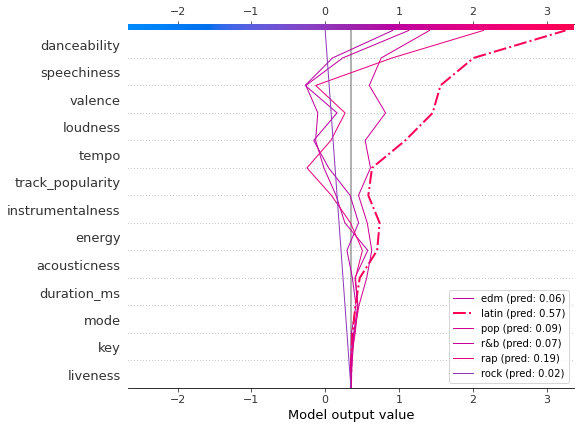

In [25]:
# plot the SHAP values of all the classes for a single instance

def class_labels(row_index):
    return [f'{trained_model.classes_[i]} (pred: {preds_proba[row_index, i].round(2)})' for i in range(len(expected_value))]


shap.multioutput_decision_plot(expected_value,
                               shap_values,
                               row_index=row_index, 
                               feature_names=eval_set.get_feature_names(), 
                               legend_labels=class_labels(row_index),
                               legend_location='lower right',
#                               link='logit',
                               highlight=np.argmax(preds_proba[row_index])) # Highlight the predicted class



Just like the force plot, the [**decision plot**](https://slundberg.github.io/shap/notebooks/plots) shows how each feature has contributed in moving away or towards the base value (the grey line, aka. the average model output on the evaluation dataset) to the predicted value of the specific instance (inputed on the left side bar), but allows us to visualize those effects **for each class**.
It also show the impact of less influencial features more clearly.

From SHAP documentation:
- *The x-axis represents the model's output. In this case, the units are log odds. (SHAP doesn't support probability output for multiclass)*
- *The plot is centered on the x-axis at explainer.expected_value (the base value). All SHAP values are relative to the model's expected value like a linear model's effects are relative to the intercept.*
- *The y-axis lists the model's features. By default, the features are ordered by descending importance. The importance is calculated over the observations plotted. _This is usually different than the importance ordering for the entire dataset._ In addition to feature importance ordering, the decision plot also supports hierarchical cluster feature ordering and user-defined feature ordering.*
- *Each observation's prediction is represented by a colored line. At the top of the plot, each line strikes the x-axis at its corresponding observation's predicted value. This value determines the color of the line on a spectrum.*
- *Moving from the bottom of the plot to the top, SHAP values for each feature are added to the model's base value. This shows how each feature contributes to the overall prediction.*
- *At the bottom of the plot, the observations converge at explainer.expected_value (the base value)*


## Pickle the model and some data for the Streamlit app

In [26]:
# Save CatBoost model
trained_model.save_model("data/catboost_model",
                              format="cbm",
                              export_parameters=None,
                              pool=train_set)

In [27]:
# Pickle 
pickle.dump(X_test, open("data/X_test", "wb"))
pickle.dump(eval_set.get_feature_names(), open("data/eval_set_features", "wb"))
pickle.dump(train_set.get_feature_names(), open("data/train_set_features", "wb"))
pickle.dump(shap_values, open("data/shap_values", "wb"))
pickle.dump(expected_value, open("data/expected_value", "wb"))